##Random Forest with ['LeverZmax','LeverZmin','HLZmax','HLZmin'] performs at nearly 70% accuracy. Performs at 80% with removing NextLever omits (0)
['LeverZmax','HLZmax'] = 54%


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')
behav = pd.read_csv('C:/Users/wonnp/Documents/GitHub/ML-For-Beginners/Photometry/data/100to300behavior.csv')


removeOmits = behav[behav['NextLever'] != 0]


In [43]:
removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
removeOmits['NextLever'] = removeOmits['NextLever'].replace(2, 1)

ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.head

C:\Users\wonnp\AppData\Local\Temp\ipykernel_13196\1309180539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(1, 0)
C:\Users\wonnp\AppData\Local\Temp\ipykernel_13196\1309180539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeOmits['NextLever'] = removeOmits['NextLever'].replace(3, 1)
C:\Users\wonnp\AppData\Local\Temp\ipykernel_13196\1309180539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230109      21      3          1     1   1.327565  -2.075430   
21    16  230109      22      2          1     4   1.013489  -0.201105   
22    16  230109      23      3          1     1   1.279473   0.466496   
23    16  230109      24      3          1     1   0.922766  -2.325989   
24    16  230109      25      3          1     1   0.928536  -2.505650   
...   ..     ...     ...    ...        ...   ...        ...        ...   
4974  32  230407      46      2          1     4   2.178934  -2.011815   
4975  32  230407      47      2          0     2   1.441027  -1.541796   
4977  32  230407      50      1          1     0   0.368848  -0.990443   
4978  32  230407      51      3          0     3   3.332265  -1.602789   
4980  32  230407      55      1          1     0   0.637471  -3.201188   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20    -74.113150  3.140363 -2.

In [44]:

feature_names = ['Trial#','LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC','NextLever'] 
df_filtered = df[feature_names]


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Example dataset
# Replace this with your actual dataset

# Assuming df is your DataFrame and 'NextLever' is the target variable
X = df_filtered[['Trial#','LeverZmax','LeverZmin','HLZmax','HLZmin','HLAUC']]  # Predictor variables
y = df_filtered['NextLever']  # Target variable with three categories

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creating the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training the classifier using the resampled training data
rf.fit(X_train_res, y_train_res)

# Making predictions on the test data
y_pred = rf.predict(X_test)

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.26      0.18        50
           1       0.94      0.88      0.91       654

    accuracy                           0.84       704
   macro avg       0.54      0.57      0.55       704
weighted avg       0.88      0.84      0.86       704

Confusion Matrix:
[[ 13  37]
 [ 79 575]]


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained Random Forest model
feature_importances = rf.feature_importances_

# Getting feature names (make sure this matches the order of features used in the model)
feature_names = X_train_res.columns  # Adjust X_train to your training dataset

# Create a pandas Series to view the feature importances
importances = pd.Series(feature_importances, index=feature_names)


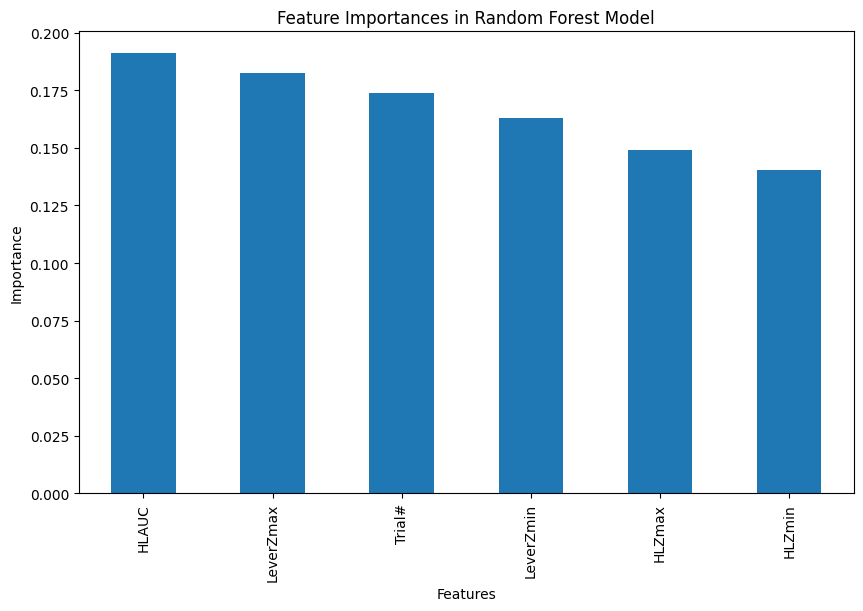

In [48]:
# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


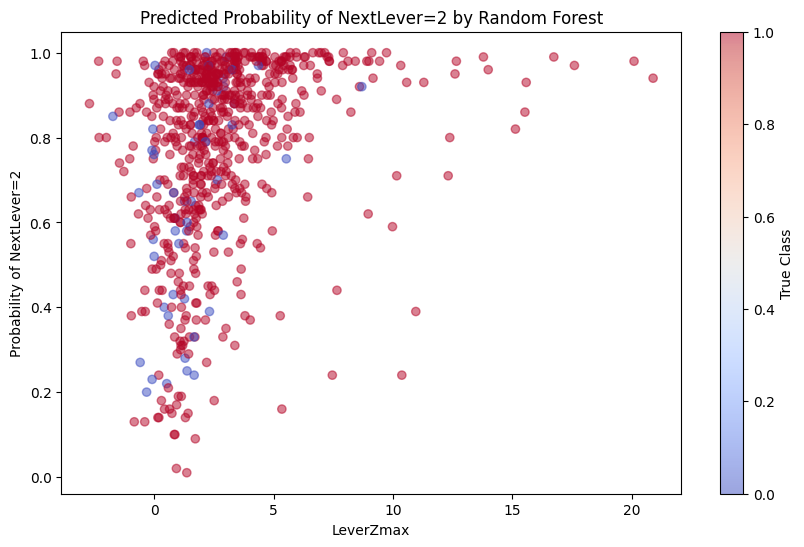

In [49]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 1]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverZmax']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=2')
plt.title('Predicted Probability of NextLever=2 by Random Forest')
plt.show()


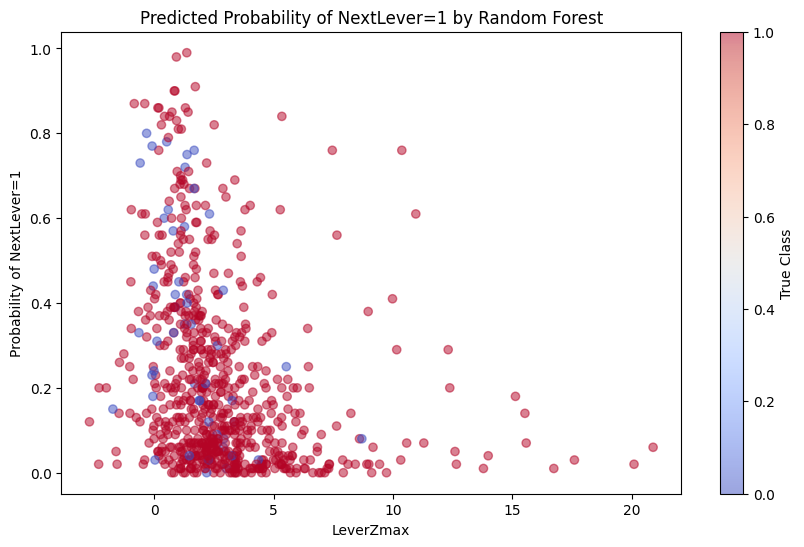

In [50]:
y_prob = rf.predict_proba(X_test)  # rf is your trained Random Forest model
prob_next_lever_2 = y_prob[:, 0]

import matplotlib.pyplot as plt

# This assumes X_test has a meaningful index or a specific column to use for the x-axis
# Replace 'X_axis_column' with the column name or index to plot on the x-axis
x_axis = X_test['LeverZmax']  

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, prob_next_lever_2, c=y_test, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='True Class')
plt.xlabel('LeverZmax')
plt.ylabel('Probability of NextLever=1')
plt.title('Predicted Probability of NextLever=1 by Random Forest')
plt.show()